<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week5featureeng/d8timeseries/TimesSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import datetime as dt
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import missingno as m
import pycaret

from sklearn.pipeline import Pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config 

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [78]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
#from catboost              import CatBoostClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [79]:
df = pd.read_csv('climate.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [80]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [82]:
df_ts = pd.DataFrame(df,index = range(1,len(df)))

In [83]:
"""exta = [t.strip().split(".") for t in df_ts['Date Time']]

exta = np.array(exta)
df_ts["Day"] = exta[:,0]
df_ts["Month"] = exta[:,1]
#df_sp["Day"] = exta[:,2]
#df_sp["Time"] = exta[:,3][:2]
df_ts"""

'exta = [t.strip().split(".") for t in df_ts[\'Date Time\']]\n\nexta = np.array(exta)\ndf_ts["Day"] = exta[:,0]\ndf_ts["Month"] = exta[:,1]\n#df_sp["Day"] = exta[:,2]\n#df_sp["Time"] = exta[:,3][:2]\ndf_ts'

In [84]:
"""extaa = [t.strip().split(" ")[1].split(":")[:1] for t in df_ts['Date Time']]
df_ts["Time"] = extaa
xx =[t.strip().split(" ")[0].split(".")[2] for t in df_ts['Date Time']]
df_ts["Year"] = xx
df_ts = df_ts.drop(['Date Time'],1)"""

'extaa = [t.strip().split(" ")[1].split(":")[:1] for t in df_ts[\'Date Time\']]\ndf_ts["Time"] = extaa\nxx =[t.strip().split(" ")[0].split(".")[2] for t in df_ts[\'Date Time\']]\ndf_ts["Year"] = xx\ndf_ts = df_ts.drop([\'Date Time\'],1)'

In [85]:
'''df_ts.head()'''

'df_ts.head()'

In [86]:
'''[t.strip().split(".")[2].split(":")[0][5:7] for t in df_ts['Date Time']]'''

'[t.strip().split(".")[2].split(":")[0][5:7] for t in df_ts[\'Date Time\']]'

In [87]:
df_ts['Date Time'] = pd.to_datetime(df_ts['Date Time'])#we dont need to seperate the time until we know there is 10min inc every row

In [88]:
df_ts['Year'] = df_ts['Date Time'].dt.year
df_ts['Month'] = df_ts['Date Time'].dt.month
df_ts['Day'] = df_ts['Date Time'].dt.day
df_ts['Time'] = df_ts['Date Time'].dt.time
df_ts = df_ts.drop(['Date Time'],1)

In [89]:
df_ts

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year,Month,Day,Time
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009,1,1,00:20:00
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009,1,1,00:30:00
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009,1,1,00:40:00
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009,1,1,00:50:00
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,2009,1,1,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016,12,31,23:20:00
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016,12,31,23:30:00
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016,12,31,23:40:00
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016,12,31,23:50:00


In [60]:
df.keys()

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

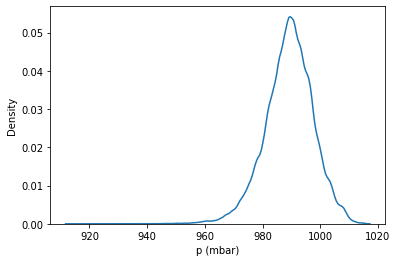

In [61]:
sns.kdeplot(data=df_ts, x='p (mbar)')

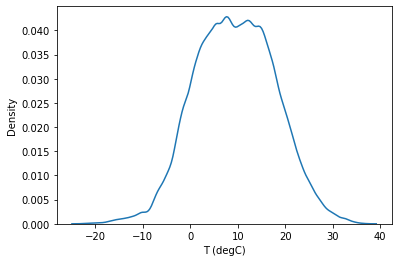

In [62]:
sns.kdeplot(data=df, x='T (degC)')

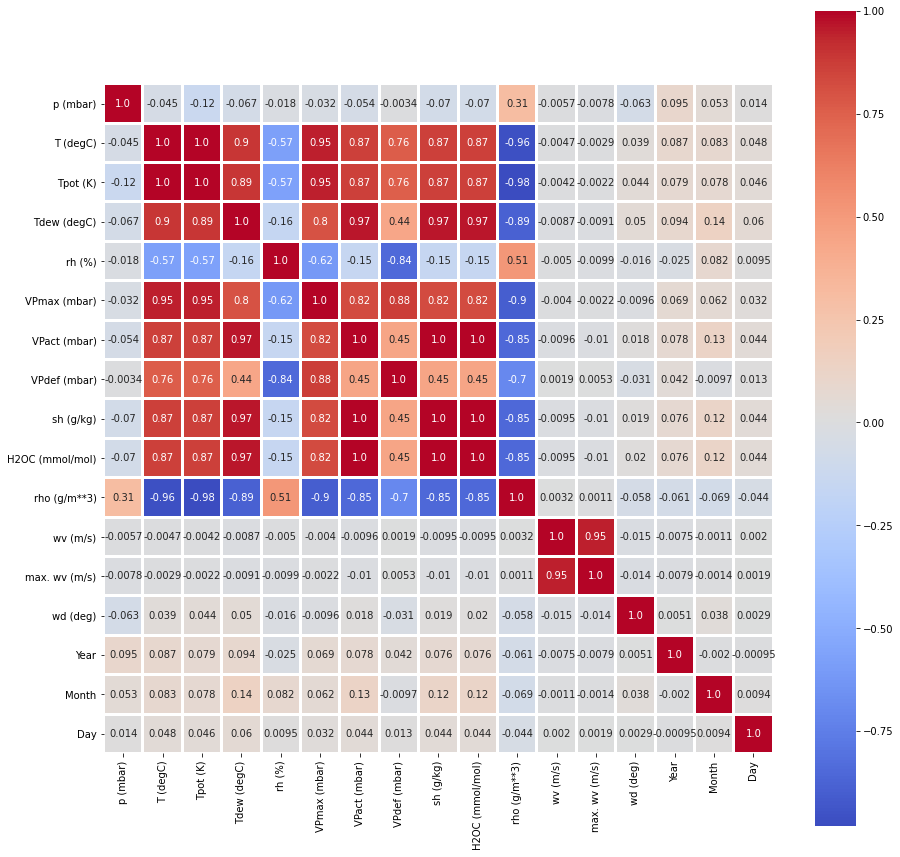

In [63]:
corr = df_ts.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True)#

In [20]:
df_ts

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year,Month,Day,Time
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1,2009,1,1,00:20:00
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6,2009,1,1,00:30:00
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0,2009,1,1,00:40:00
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3,2009,1,1,00:50:00
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7,2009,1,1,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016,12,31,23:20:00
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016,12,31,23:30:00
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016,12,31,23:40:00
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016,12,31,23:50:00


In [22]:
#df_ts['TikTok'] = range(1,(len(df_ts.index.values)+1))

In [41]:
y = df['T (degC)']

0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), Length: 420551, dtype: float64

In [ ]:
x

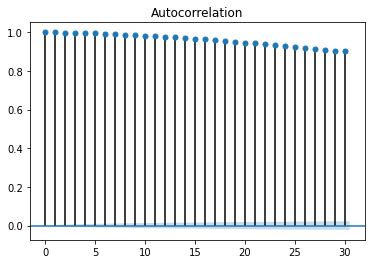

In [43]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y,lags=30)
pyplot.show()

In [ ]:
fig,ax = plt.subplots(17,1,figsize=(20,65))
for i,column in enumerate([col for col in df_ts.columns if col != 'Time']):
    df_ts[column].plot(ax=ax[i])
    ax[i].set_title(column)

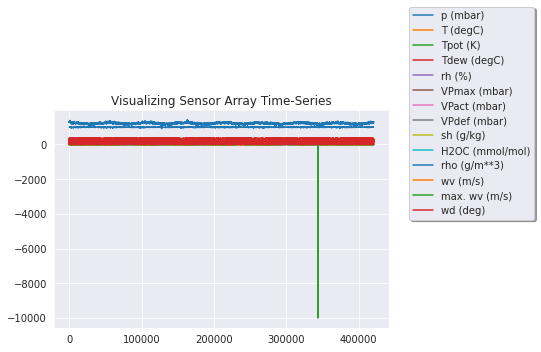

"# Dropping Temperature & Relative Humidity as they do not change with Time\ndsf.drop(['Temperature','Rel_Humidity'], axis = 1, inplace = True)\n\n# Again Visualizing the time-series data\nsb.set_style('darkgrid')\nds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series')\nplt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))\nplt.show()"

In [94]:


# Importing Dataset
dff =  pd.read_csv("climate.csv")
dsf = df.drop(['Date Time'], axis = 1)

# Visualize the trends in data
sns.set_style('darkgrid')
dsf.plot(kind = 'line', title = 'Visualizing Sensor Array Time-Series')
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.45, 1.5))
plt.show()

In [97]:
train = df_ts[df_ts['Year'] < 2015]
test = df_ts[df_ts['Year'] >= 2015]

In [98]:
train.shape, test.shape

((315730, 18), (104820, 18))

In [100]:
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'T (degC)', fold_strategy = 'timeseries', numeric_features = ['p (mbar)', 'Tpot (K)','Tdew (degC)','VPmax (mbar)','Year','wv (m/s)'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,T (degC)
2,Original Data,"(315730, 18)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(315730, 168)"


In [101]:
best = compare_models(sort = 'MAE')

IntProgress(value=0, description='Processing: ', max=89)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:25:50
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0,0.0,0.0,0.0,0.0,0.0,0.1767
ada,AdaBoost Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1700
et,Extra Trees Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1667
rf,Random Forest Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1667
dt,Decision Tree Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1733
knn,K Neighbors Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1633
huber,Huber Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1700
gbr,Gradient Boosting Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1633
par,Passive Aggressive Regressor,0.0,0.0,0.0,0.0,0.0,0.0,0.1633
omp,Orthogonal Matching Pursuit,0.0,0.0,0.0,0.0,0.0,0.0,0.1833


ValueError: ignored

In [106]:
#a different approach
data = df
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
 
values = [x for x in range(10)]
print(data)

                  Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  \
0       01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90   
1       01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28   
2       01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31   
3       01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07   
4       01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04   
...                     ...       ...       ...       ...          ...   
420546  31.12.2016 23:20:00   1000.07     -4.05    269.10        -8.13   
420547  31.12.2016 23:30:00    999.93     -3.35    269.81        -8.06   
420548  31.12.2016 23:40:00    999.82     -3.16    270.01        -8.21   
420549  31.12.2016 23:50:00    999.81     -4.23    268.94        -8.53   
420550  01.01.2017 00:00:00    999.82     -4.82    268.36        -8.42   

        rh (%)  VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  \
0        93.30          3.33          3.

In [107]:
df = df.drop(['Date Time'],1)

In [108]:
df_train = df_ts[df_ts['Year'] < 2015]
df_test = df_ts[df_ts['Year'] >= 2015]

In [109]:
df_train.shape, df_test.shape

((315730, 18), (104820, 18))

In [119]:
df_train = df_train.iloc[:, [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,0]]

In [116]:
df_test = df_test.iloc[:, [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,0]]

,T (degC),Tpot (K),Tdew (degC),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year,Month,Day,Time,p (mbar)
315731,2.06,274.65,1.89,7.09,7.00,0.09,4.34,6.95,1271.51,0.41,0.92,273.8,2015,1,1,00:00:00,1007.19
315732,2.15,274.75,1.99,7.13,7.06,0.08,4.37,7.01,1271.07,0.33,0.74,136.3,2015,1,1,00:10:00,1007.19
315733,2.10,274.70,1.93,7.11,7.03,0.09,4.35,6.98,1271.28,0.65,1.16,129.3,2015,1,1,00:20:00,1007.18
315734,2.08,274.67,1.91,7.10,7.01,0.09,4.34,6.96,1271.40,0.46,1.64,134.1,2015,1,1,00:30:00,1007.17
315735,2.07,274.67,1.92,7.10,7.02,0.08,4.35,6.97,1271.41,0.63,1.60,95.9,2015,1,1,00:40:00,1007.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,-4.05,269.10,-8.13,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0,2016,12,31,23:20:00,1000.07
420547,-3.35,269.81,-8.06,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3,2016,12,31,23:30:00,999.93
420548,-3.16,270.01,-8.21,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2,2016,12,31,23:40:00,999.82
420549,-4.23,268.94,-8.53,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8,2016,12,31,23:50:00,999.81


In [141]:
X_train,y_train = df_train.iloc[:,1:],df_train.iloc[:,0]

In [123]:
y_train

1        -8.41
2        -8.51
3        -8.31
4        -8.27
5        -8.05
          ... 
315726    2.08
315727    2.09
315728    2.17
315729    2.18
315730    2.16
Name: T (degC), Length: 315730, dtype: float64

In [142]:
X_test,y_test = df_test.iloc[:,1:],df_test.iloc[:,0]

In [150]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

ValueError: ignored

In [144]:
X_test = X_test.drop(['Time'],1)
X_train = X_train.drop(['Time'],1)

In [145]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)       

In [148]:
yhat = LR.predict(X_test)

NotFittedError: ignored